In [1]:
from MFEA_lib.model import MFEA_base
from MFEA_lib.model.utils import *
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.tasks.Benchmark.Competitions import *

#### Benchmark

##### CEC17

In [2]:
# tasks, IndClass = CEC17_benchmark.get_2tasks_benchmark(1)
# tasks, IndClass = WCCI22_benchmark.get_complex_benchmark(1)
tasks, IndClass = CEC17_benchmark.get_10tasks_benchmark()

1 time

In [3]:
baseModel = MFEA_base.model()
baseModel.compile(
    IndClass= IndClass,
    tasks= tasks,
    # crossover = KL_SBXCrossover(nc= 2, k= 100, conf_thres= 1),
    crossover= SBX_Crossover(nc = 2),
    mutation= PolynomialMutation(nm = 5),
    selection= ElitismSelection()
)
solve = baseModel.fit(
    nb_generations = 1000, rmp = 0.3, nb_inds_each_task= 100, 
    bound_pop= [0, 1], evaluate_initial_skillFactor= True
)

Seed: None -- Time: 00m 57.17s  100 % [====================>]  Cost: 1.71E-01  3.73E-02  4.98E-02  1.71E-01  1.02E+01  6.64E-02  8.66E-01  3.04E+03  2.16E-02  2.71E+01  ,  
END!


2m23s
+ selection: 1.3s
+ crossover: 14s
+ mutation: 22s

30 times

In [3]:
baseModel = MultiTimeModel(model= MFEA_base)
baseModel.compile(
    IndClass= IndClass,
    tasks= tasks,
    crossover= SBX_Crossover(nc = 2),
    mutation= PolynomialMutation(nm = 5),
    selection= ElitismSelection()
)
baseModel.fit(
    nb_generations = 1000, rmp = 0.3, nb_inds_each_task= 100, 
    bound_pop= [0, 1], evaluate_initial_skillFactor= True
)

In [8]:
# baseModel = loadModel('./RESULTS/MFEA_cec17.mso')

In [4]:
baseModel.run(
    nb_run= 1,
    save_path= './RESULTS/MFEA_cec17t.mso'
)

Time: 02m 23.96s  100 % [====================>]  Cost: 8.01E-02  3.06E-02  1.37E-01  2.62E-01  6.87E+00  5.80E-02  9.15E-01  3.28E+03  5.52E-02  3.79E+01  ,  
END!
DONE!
Saved


In [3]:
baseModel = loadModel('./RESULTS/MFEA_cec17t.mso', ls_tasks= tasks, set_attribute= True)

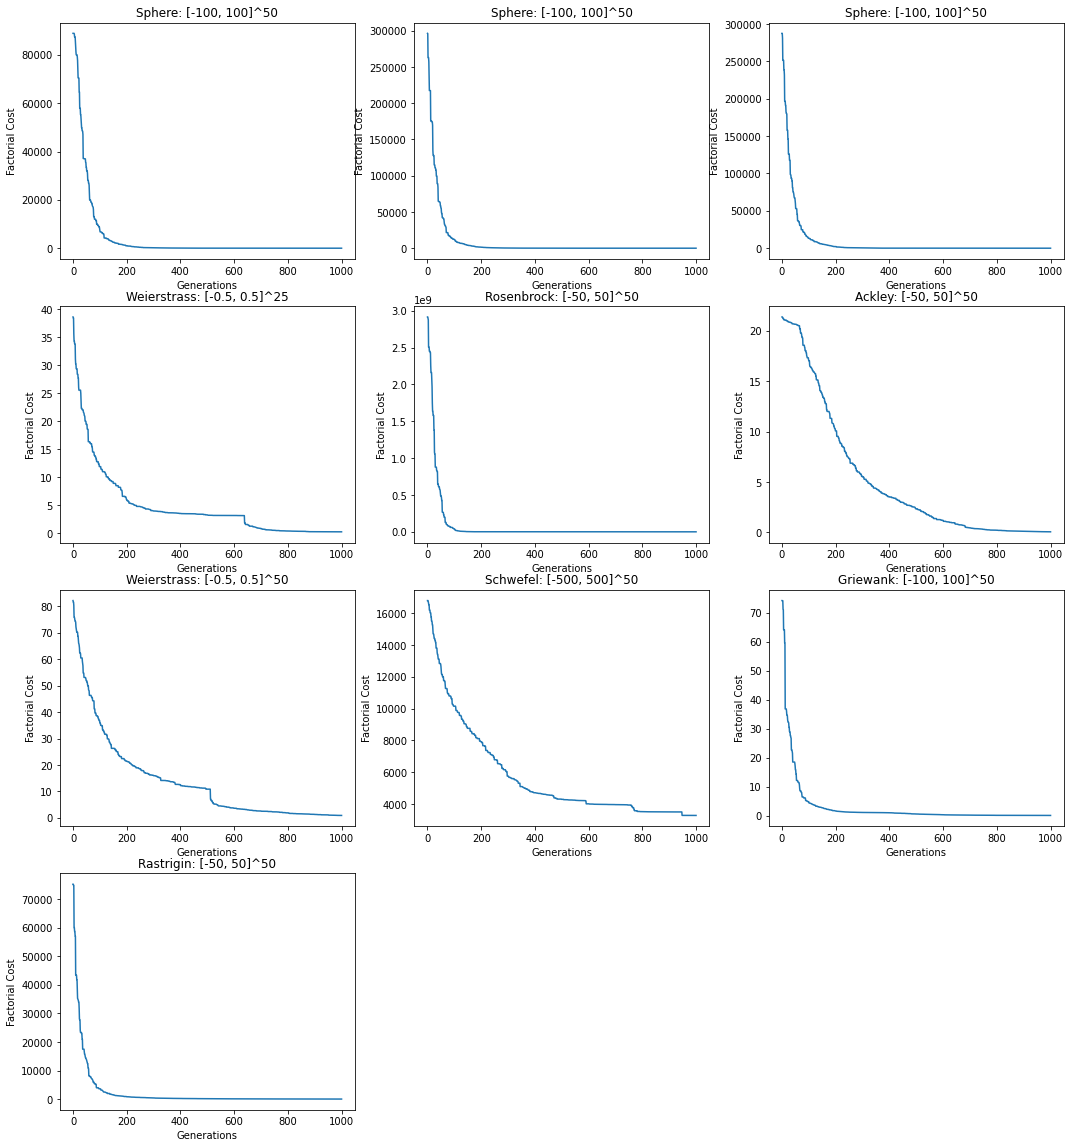

In [4]:
baseModel.render_history()
print()

#### Compare

In [5]:
MFEA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MFEA_cec17.mso')
EBS_GA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/EBS_GA_cec17.mso')
MaTDE_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MaTDE_cec17.mso')
MaTGA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MaTGA_cec17.mso')
MTEA_AD_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MTEA_AD_cec17.mso')

ModuleNotFoundError: No module named 'MFEA_lib.tasks.function'

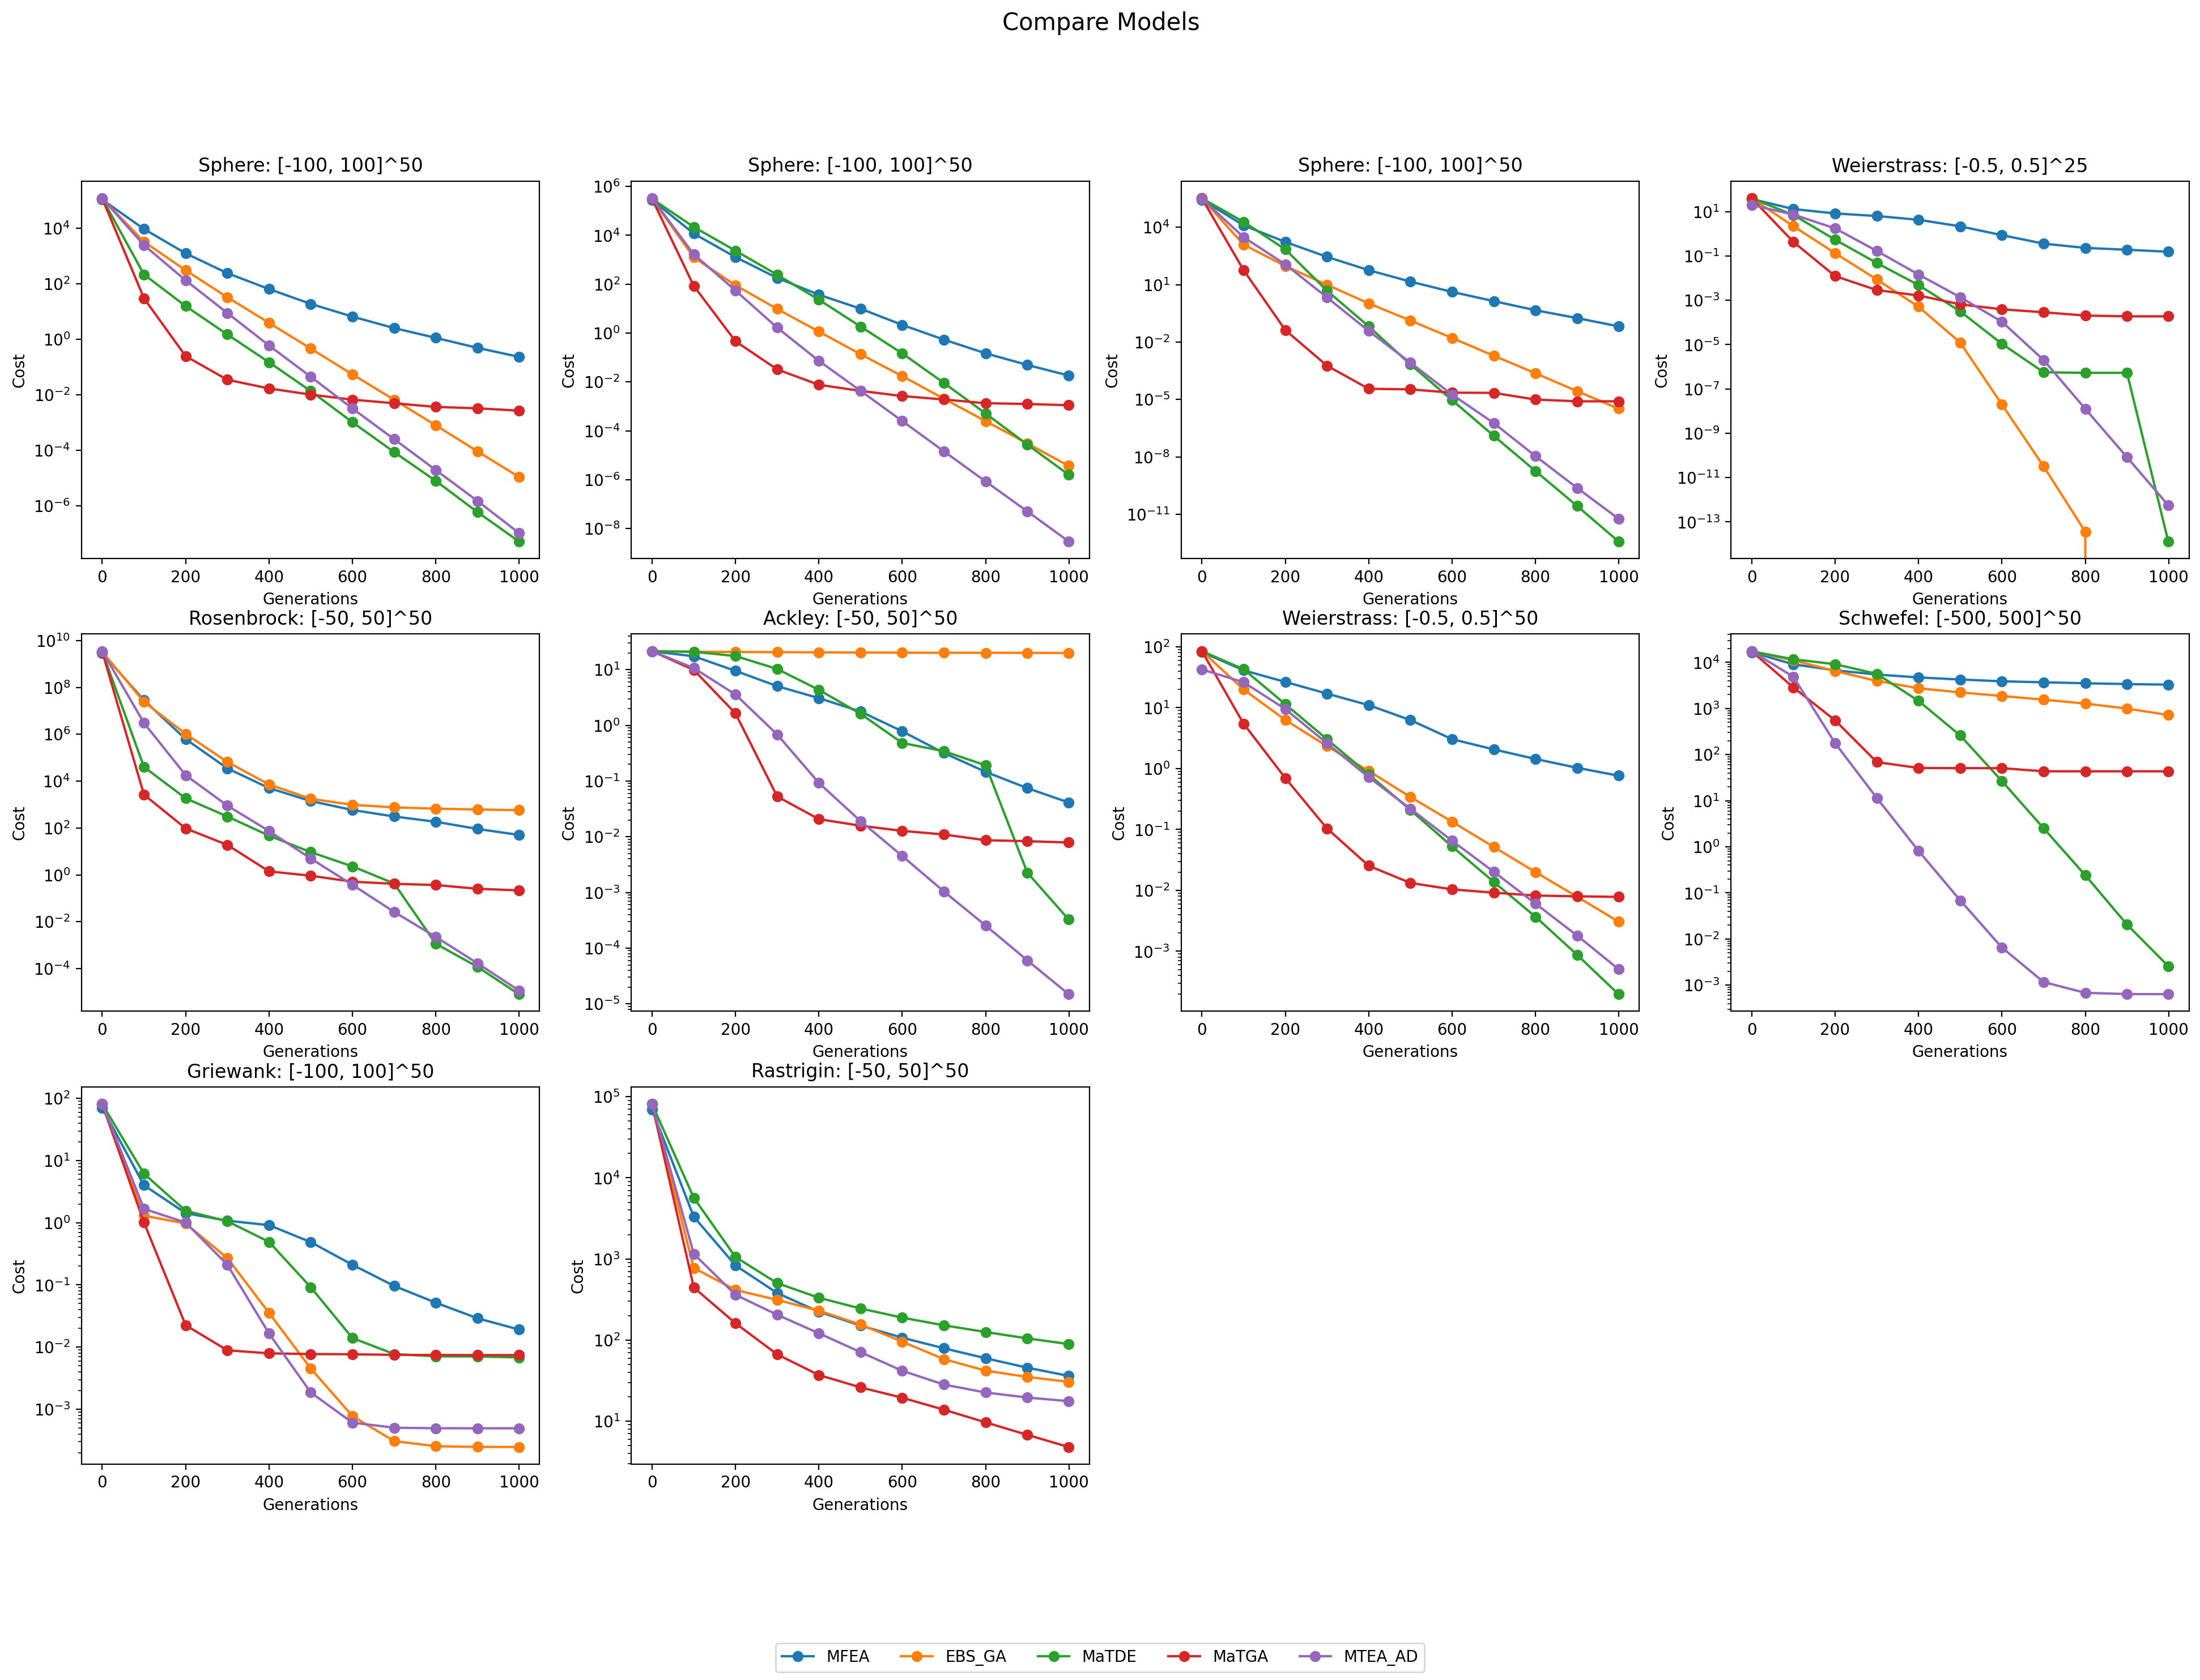

In [4]:
fig = CompareModel(
    models=[MFEA_model, EBS_GA_model, MaTDE_model, MaTGA_model, MTEA_AD_model],
    label=[...] * 5
).render(
    shape=(3, 4),
    min_cost=0,
    step=100,
    yscale='log',
    re= True
)
